In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet
from scipy.stats import multivariate_normal as multi_norm
from sklearn.linear_model import LinearRegression as Linear
from scipy.optimize import brentq
from scipy.special import perm,comb
import time
import pandas as pd

**10.3**

In [2]:
m=32
n=2*(m**2)
grid=np.meshgrid(np.linspace(0,1-1/m,m),np.linspace(0,1-1/m,m))
def f(S):
    x1=S[0]
    x2=S[1]
    return x1**2*np.exp(x1*x2)
    
def estimate_gs(rep):
    mu=np.zeros(rep)
    Var1=np.zeros(rep)
    Var2=np.zeros(rep)
    for i in range(rep):
        U1=uniform.rvs(size=n).reshape([2,m,m])/m
        S1=(grid+U1).reshape(2,-1)
        F1=f(S1)
        mu1=np.mean(F1)
        U2=uniform.rvs(size=n).reshape([2,m,m])/m
        S2=(grid+U2).reshape(2,-1)
        F2=f(S2)
        mu2=np.mean(F2)
        mu[i]=(mu1+mu2)/2
        Var1[i]=np.sum((F1-F2)**2)/(4*m**4)
        Var2[i]=(mu1-mu2)**2/4
        
    return mu,Var1,Var2

mu,Var1,Var2=estimate_gs(10000)

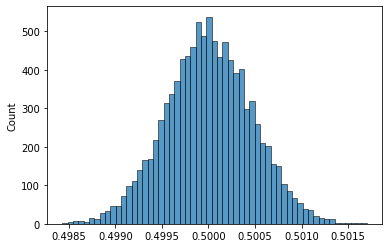

variance: 2.1426421722094014e-07


In [3]:
sb.histplot(mu)
plt.show()
print('variance:',np.var(mu))

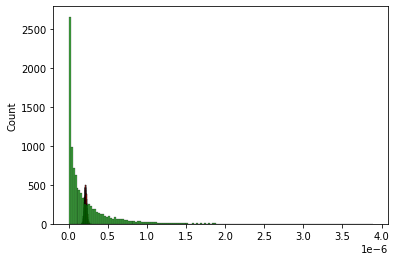

Var1: 2.1584538081678017e-07 1.5646570384320216e-08
Var2: 2.213054602036052e-07 3.0926148440668396e-07
390.6729626773172


In [4]:
sb.histplot(Var1,color='r')
sb.histplot(Var2,color='g')
plt.show()
print('Var1:',np.mean(Var1),np.std(Var1))
print('Var2:',np.mean(Var2),np.std(Var2))
print(np.var(Var2)/np.var(Var1))

**10.4**

In [5]:
alpha=1/2
def f(X):
    J=np.arange(1,1001)*1.0
    g=1+(X**alpha/J**2).sum(axis=1)
    return 1/g

n=1000
X=uniform.rvs(size=n*1000).reshape([n,1000])
FX=f(X)
print(np.mean(FX),np.std(FX))

0.47906379141841127 0.06053086850956688


In [6]:
n=100
r=100
mu=np.zeros(r)
for i in range(r):
    X=np.zeros([n,1000])
    for d in range(1000):
        X[:,d]=(np.random.choice(np.arange(n),size=n,replace=False)+uniform.rvs(size=n))/n
    
    mu[i]=np.mean(f(X))
    
print(np.mean(mu),np.std(mu))

0.4842544405942508 0.0004081023221762047


**10.5**

In [7]:
def f(X):
    return (-1)**(X>0.5).sum(axis=1)

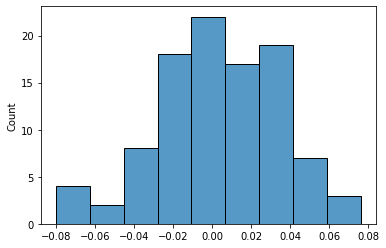

0.03162277660168379 0.03180125783675859


In [8]:
n=1000
r=100
mu=np.zeros(r)
for i in range(r):
    X=np.zeros([n,1000])
    for d in range(1000):
        X[:,d]=(np.random.choice(np.arange(n),size=n,replace=False)+uniform.rvs(size=n))/n
    
    mu[i]=np.mean(f(X))
    
sb.histplot(mu)
plt.show()
print(1/np.sqrt(n),np.std(mu))

**10.7**

9.550713620031285e-19 6.906603338471383e-20


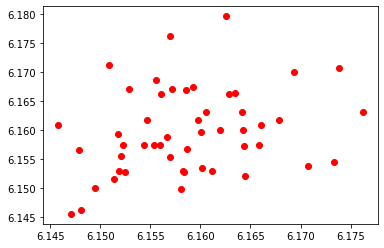

In [9]:
f=lambda X: X.min(axis=1)
p=lambda X: multi_norm.pdf(x=X,mean=[0,0])
q=[lambda size,theta: multi_norm.rvs(size=size,mean=theta),lambda X,theta: multi_norm.pdf(x=X,mean=theta)]
n=10000
K=10
tau=6
eps=0.01
def AIS():
    Tau=np.zeros(K)
    Theta=np.zeros([K+1,2])
    for k in range(K):
        X=q[0](n,Theta[k])
        Tau[k]=np.quantile(f(X),1-eps)
        Tau[k]=min(tau,Tau[k])    
        W=p(X)/q[1](X,Theta[k])
        H=W*(f(X)>=Tau[k])
        Theta[k+1]=np.sum(H.reshape([n,1])*X,axis=0)/np.sum(H)

    mu=np.mean(W*(f(X)>=tau))
    return mu,Theta[K-1]

rep=50
Mu=np.zeros(rep)
Theta=np.zeros(2*rep).reshape([-1,2])
for r in range(rep):
    Mu[r],Theta[r]=AIS()
    
print(np.mean(Mu),np.std(Mu))
plt.plot(Theta[:,0],Theta[:,1],'ro')
plt.show()

**10.8**

9.91679678382701e-10 2.726416364302781e-11


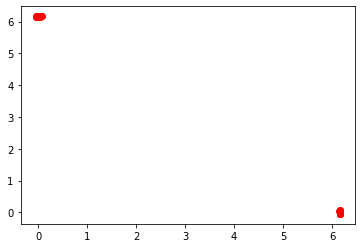

1.983359356765402e-09


In [10]:
f=lambda X: X.max(axis=1)
p=lambda X: multi_norm.pdf(x=X,mean=[0,0])
q=[lambda size,theta: multi_norm.rvs(size=size,mean=theta),lambda X,theta: multi_norm.pdf(x=X,mean=theta)]
n=10000
K=10
tau=6
eps=0.01
def AIS():
    Tau=np.zeros(K)
    Theta=np.zeros([K+1,2])
    for k in range(K):
        X=q[0](n,Theta[k])
        Tau[k]=np.quantile(f(X),1-eps)
        Tau[k]=min(tau,Tau[k])    
        W=p(X)/q[1](X,Theta[k])
        H=W*(f(X)>=Tau[k])
        Theta[k+1]=np.sum(H.reshape([n,1])*X,axis=0)/np.sum(H)

    mu=np.mean(W*(f(X)>=tau))
    return mu,Theta[K-1]

rep=50
Mu=np.zeros(rep)
Theta=np.zeros(2*rep).reshape([-1,2])
for r in range(rep):
    Mu[r],Theta[r]=AIS()
    
print(np.mean(Mu),np.std(Mu))
plt.plot(Theta[:,0],Theta[:,1],'ro')
plt.show()
print(2*np.mean(Mu))

**10.10**

In [11]:
A=1
f=lambda x: np.exp(A*x)
p=lambda x: norm.pdf(x=x)
mu=np.exp(A**2/2)
q=[lambda size,theta: norm.rvs(size=size,loc=theta),lambda x,theta: norm.pdf(x=x,loc=theta)]
n=20
K=400
def toy():
    Theta=np.zeros(K+1)
    Mu=np.zeros(K)
    eps=1e-12
    flag=False
    for k in range(K):
        x=q[0](n,Theta[k])
        W=f(x)*p(x)/q[1](x,Theta[k])
        Mu[k]=np.mean(W)
        if Mu[k]<1:
            flag=True
            
        if np.abs(Mu[k]-mu)<eps:
            break
            
        Theta[k+1]=np.sqrt(2*np.log(max(1,Mu[k])))
        
    return k,Mu[k],Theta[k],flag

N=1000
KK=np.zeros(N)
Mu=np.zeros(N)
Theta=np.zeros(N)
Flag=np.zeros(N)
for i in range(N):
    KK[i],Mu[i],Theta[i],Flag[i]=toy()

In [12]:
print('success rate:',np.mean(np.abs(Mu-mu)<eps))
print('success step:',np.mean(KK))
print('average mu(k)<1:',np.mean(Flag))

success rate: 1.0
success step: 12.95
average mu(k)<1: 0.038


**10.11**

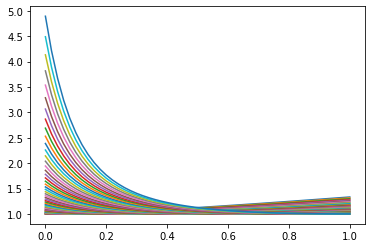

1.1249444522319425 1.125


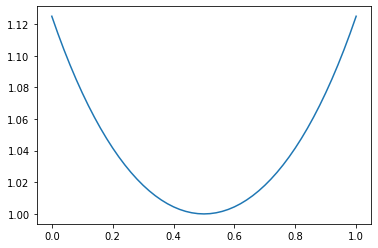

In [13]:
def Var(r0,r1,K):
    K=(np.arange(K)+1)**1.0
    nom=np.sum(K**(2*r1-r0))
    den=np.sum(K**r1)**2
    return nom/den

K=10000
N=50
R1=np.linspace(0,1,N+1)
def exp(r0):
    VAR=np.zeros(N+1)
    for i,r1 in enumerate(R1):
        VAR[i]=Var(r0,r1,K)
        
    return VAR
    
R0=np.linspace(0,1,N+1)
Mid=np.zeros(N+1)
for i,r0 in enumerate(R0):
    VAR=exp(r0)
    Mid[i]=VAR[int(N/2)]/Var(r0,r0,K)
    plt.plot(R1,VAR/Var(r0,r0,K))

plt.show()

print(np.max(Mid),9/8)
plt.plot(R0,Mid)
plt.show()

**10.12**

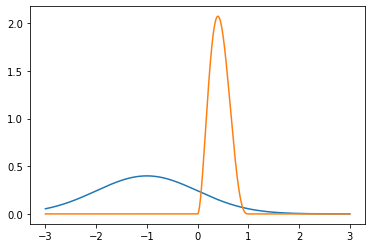

In [14]:
p0=lambda x: np.exp(-(x+1)**2/2)
p0rvs=lambda size: norm.rvs(size=size,loc=-1)
p1=lambda x: (x**2)*((1-x)**3)*(x>0)*(x<1)
p1rvs=lambda size: beta.rvs(size=size,a=3,b=4)
Z0=np.sqrt(2*np.pi)
Z1=1/60
rho=Z1/Z0

x=np.linspace(-3,3,1000)
plt.plot(x,p0(x)/Z0)
plt.plot(x,p1(x)/Z1)
plt.show()

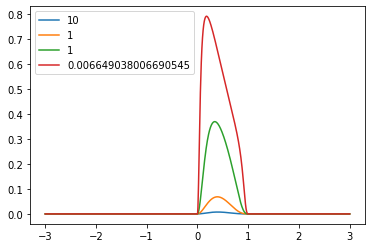

In [15]:
n0=1000
n1=1200
s0=n0/(n0+n1)
s1=n1/(n0+n1)
p12=lambda x,rho0: p0(x)*p1(x)/(rho0*s0*p0(x)+s1*p1(x))
plt.plot(x,p12(x,10),label=10)
plt.plot(x,p12(x,1),label=1)
plt.plot(x,p12(x,0.1),label=1)
plt.plot(x,p12(x,rho),label=rho)
plt.legend()
plt.show()

In [16]:
def bridge(Rho):
    X0=p0rvs(n0)
    X1=p1rvs(n1)
    p0X0=p0(X0)
    p0X1=p0(X1)
    p1X0=p1(X0)
    p1X1=p1(X1)
    RhoE=np.zeros_like(Rho)
    for i,rho0 in enumerate(Rho):
        nom=p1X0/(rho0*s0*p0X0+s1*p1X0)
        den=p0X1/(rho0*s0*p0X1+s1*p1X1)
        RhoE[i]=np.mean(nom)/np.mean(den)
        
    return RhoE

rep=10000
Rho=[100*rho,10*rho,rho,rho/10,rho/100]
Data=np.zeros([rep,len(Rho)])
for i in range(rep):
    Data[i]=bridge(Rho)
    
print('RMSE/rho:',np.sqrt(np.mean((Data-rho)**2,axis=0))/rho)

RMSE/rho: [0.09772346 0.09213149 0.08759942 0.09447395 0.11482075]


In [17]:
def bridge():
    n0=1000
    n1=1200
    s0=n0/(n0+n1)
    s1=n1/(n0+n1)
    X0=p0rvs(n0)
    X1=p1rvs(n1)
    p0X0=p0(X0)
    p0X1=p0(X1)
    p1X0=p1(X0)
    p1X1=p1(X1)
    Rho=np.ones(7)
    for i in range(5):
        nom=p1X0/(Rho[i]*s0*p0X0+s1*p1X0)
        den=p0X1/(Rho[i]*s0*p0X1+s1*p1X1)
        Rho[i+1]=np.mean(nom)/np.mean(den)
        
    nom=p1X0/(rho*s0*p0X0+s1*p1X0)
    den=p0X1/(rho*s0*p0X1+s1*p1X1)
    Rho[6]=np.mean(nom)/np.mean(den)
    return Rho[1:]

rep=10000
Data=np.zeros([rep,6])
for i in range(rep):
    Data[i]=bridge()
    
print('RMSE/rho:',np.sqrt(np.mean((Data-rho)**2,axis=0))/rho)

RMSE/rho: [0.09924718 0.08857354 0.08856266 0.08856271 0.08856273 0.08860947]
